In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [79]:
plt.rc('text', usetex=True)

In [2]:
df = pd.read_csv('../raw/techstate_mssa2_new.csv')

In [3]:
df.head(5)

,Unnamed: 0,reg_time,cmd,fpo_work_mode,state0,state1,state2,state3,state4,state5,...,is_otkaz,is_zavisim,is_vkl,is_vkl2,is_trig,is_trba,is_vedushciy,is_mu,is_blokirovka,element_name
0,39,2020-10-20 12:42:31.559564,0,0,1,144,36,13,0,0,...,1,1,1,0,0,1,0,0,0,/ИЗД/ДР/ДРУ/ДРУ1/ДБ-101_2/ДЯ-101/7ДЯ-101 ФПО
1,40,2020-10-20 12:42:31.559564,0,0,1,144,36,13,0,0,...,1,1,1,0,0,1,0,0,0,/ИЗД/ДР/ДРУ/ДРУ1/ДБ-101_1/ДЯ-101/7ДЯ-101 ФПО
2,56,2020-10-20 12:42:31.589615,1,0,1,0,160,0,16,0,...,1,1,1,0,0,0,0,0,0,/ИЗД/ДР/ДРУ/МБ-232_1/МЯ-232/ФПОЯ_8МЯ-232
3,57,2020-10-20 12:42:31.589615,1,0,1,0,0,0,16,0,...,0,0,1,0,0,0,0,0,0,/ИЗД/ДР/ДРУ/МБ-232_1/МЯ-233/Мод ППО D1
4,58,2020-10-20 12:42:31.589615,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,/ИЗД/ДР/ДРУ/МБ-232_1/МЯ-232/Модуль ФПО3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966354 entries, 0 to 3966353
Data columns (total 33 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   reg_time       object
 2   cmd            int64 
 3   fpo_work_mode  int64 
 4   state0         int64 
 5   state1         int64 
 6   state2         int64 
 7   state3         int64 
 8   state4         int64 
 9   state5         int64 
 10  data0          int64 
 11  data1          int64 
 12  data2          int64 
 13  data3          int64 
 14  data4          int64 
 15  data5          int64 
 16  regimes        object
 17  is_rab         int64 
 18  is_rez         int64 
 19  is_rem         int64 
 20  is_reg         int64 
 21  is_ispr        int64 
 22  is_neispr      int64 
 23  is_otkaz       int64 
 24  is_zavisim     int64 
 25  is_vkl         int64 
 26  is_vkl2        int64 
 27  is_trig        int64 
 28  is_trba        int64 
 29  is_vedushciy   int64 
 30  is_mu          int

In [5]:
#convert datetime to seconds
from datetime import datetime
def to_total_seconds(s):
    pos = s.find('.')
    #startpoin is 2020-10-20 12:42:31.559564
    if pos > 0:
        return (datetime.fromisoformat(s+'0'*(26-len(s))) - datetime(2020,10,20, 12, 42, 31)).total_seconds() - .559564
    else:
        return (datetime.fromisoformat(s+'.'+'0'*6) - datetime(2020,10,20, 12, 42, 31)).total_seconds() - .559564

df['reg_time'] = df['reg_time'].apply(to_total_seconds)
df['reg_time'].head()

0    0.000000
1    0.000000
2    0.030051
3    0.030051
4    0.030051
Name: reg_time, dtype: float64

In [6]:
#encode element_name by integer-valued id
unique_names = df['element_name'].unique()
f = open("element_name_ids.csv","w")
name_to_id_dict = {}
for tmp_id, name in enumerate(unique_names):
    name_to_id_dict[name] = tmp_id
    print(name, tmp_id, sep=',', file=f)
f.close()
id_max = len(unique_names) - 1
df['id'] = np.asarray([name_to_id_dict[str(x)] for x in df['element_name']])
df['id'].head()

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

In [7]:
#drop all unnecessary clmns
df.drop(columns=['element_name'],inplace=True)
df.drop(columns=['regimes'],inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
#split dataframe by id 
df_per_id_list = [df[df['id'] == _id] for _id in range(0, len(unique_names))]
df_per_id_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8788 entries, 0 to 3965808
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reg_time       8788 non-null   float64
 1   cmd            8788 non-null   int64  
 2   fpo_work_mode  8788 non-null   int64  
 3   state0         8788 non-null   int64  
 4   state1         8788 non-null   int64  
 5   state2         8788 non-null   int64  
 6   state3         8788 non-null   int64  
 7   state4         8788 non-null   int64  
 8   state5         8788 non-null   int64  
 9   data0          8788 non-null   int64  
 10  data1          8788 non-null   int64  
 11  data2          8788 non-null   int64  
 12  data3          8788 non-null   int64  
 13  data4          8788 non-null   int64  
 14  data5          8788 non-null   int64  
 15  is_rab         8788 non-null   int64  
 16  is_rez         8788 non-null   int64  
 17  is_rem         8788 non-null   int64  
 18  is_re

In [99]:
#find diff for all sequential entries t_i and t_{i-1}
diffs = []
for _id, _df in enumerate(df_per_id_list):
    if len(_df.index) < 1000:
        diffs.append(np.array([0]))
        continue
    df_unshifted = _df.iloc[:-1].reset_index(drop=True)
    df_shifted = _df.iloc[1:].reset_index(drop=True)
    time_diffs = (df_shifted['reg_time'] - df_unshifted['reg_time']).values
    cols = [col for col in _df.columns if col not in ['reg_time']]
    features_diffs = np.sqrt((((df_shifted[cols] - df_unshifted[cols])**2).sum(axis = 1)).values)
    features_diffs = (features_diffs-features_diffs.min())/(features_diffs.max()-features_diffs.min())
    tmp = np.sort(np.multiply(time_diffs, features_diffs))
    diffs.append(tmp[(tmp != 0.0) & (tmp < 10)])
    if len(tmp[tmp != 0.0]) == 0:
        raise NameError('Err') 
print(diffs[0])
print(len(diffs))

[9.86606897e-08 5.36424626e-06 9.11226189e-06 ... 8.28448000e+00
 8.43205215e+00 9.38159105e+00]
4299


In [100]:
# collect representative ids with at least 1000 entries
id_list = [x for x in range(0, len(diffs)) if len(diffs[x]) > 1000]
len(id_list)

218

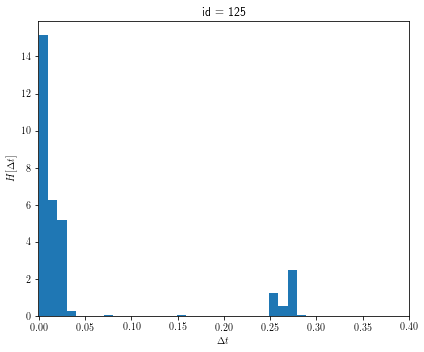

In [124]:
print_id = 42
fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(diffs[id_list[print_id]], bins=1000, density=True)
plt.xlabel('$\Delta t$')
plt.ylabel('$H[\Delta t]$')
plt.xlim(-0.001, 0.4)
# plt.ylim(0, 0.4)
plt.title("id = {}".format(id_list[print_id]))
plt.tight_layout()
plt.draw()
plt.show()
fig.savefig("plots/dstr/id{}.png".format(id_list[print_id]))